In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

combined_df = pd.merge(study_results, mouse_metadata, on = "Mouse ID", how = "left" )
# Display the data table for preview
combined_df.head()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0                45.0                 0    Capomulin   
1     f932          0                45.0                 0     Ketapril   
2     g107          0                45.0                 0     Ketapril   
3     a457          0                45.0                 0     Ketapril   
4     c819          0                45.0                 0     Ketapril   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1    Male          15          29  
2  Female           2          29  
3  Female          11          30  
4    Male          21          25

In [2]:
# Checking the number of mice.
mice_list = len(combined_df["Mouse ID"].unique())
mice_list

249

In [3]:
duplicate_mice = combined_df.loc[combined_df.duplicated(subset = ['Mouse ID','Timepoint']), 'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [4]:
duplicate_df = combined_df.loc[combined_df['Mouse ID'] == "g989", :]
duplicate_df

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
107      g989          0           45.000000                 0     Propriva   
137      g989          0           45.000000                 0     Propriva   
329      g989          5           48.786801                 0     Propriva   
360      g989          5           47.570392                 0     Propriva   
620      g989         10           51.745156                 0     Propriva   
681      g989         10           49.880528                 0     Propriva   
815      g989         15           51.325852                 1     Propriva   
869      g989         15           53.442020                 0     Propriva   
950      g989         20           55.326122                 1     Propriva   
1111     g989         20           54.657650                 1     Propriva   
1195     g989         25           56.045564                 1     Propriva   
1380     g989         30           59.082294                 1     Propriva   
1592     g989         35           62.570880                 2     Propriva   

         Sex  Age_months  Weight (g)  
107   Female          21          26  
137   Female          21          26  
329   Female          21          26  
360   Female          21          26  
620   Female          21          26  
681   Female          21          26  
815   Female          21          26  
869   Female          21          26  
950   Female          21          26  
1111  Female          21          26  
1195  Female          21          26  
1380  Female          21          26  
1592  Female          21          26

In [5]:
clean_data = combined_df[combined_df['Mouse ID'].isin(duplicate_mice)==False]
clean_data

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0        b128          0           45.000000                 0    Capomulin   
1        f932          0           45.000000                 0     Ketapril   
2        g107          0           45.000000                 0     Ketapril   
3        a457          0           45.000000                 0     Ketapril   
4        c819          0           45.000000                 0     Ketapril   
...       ...        ...                 ...               ...          ...   
1888     r944         45           41.581521                 2    Capomulin   
1889     u364         45           31.023923                 3    Capomulin   
1890     p438         45           61.433892                 1     Ceftamin   
1891     x773         45           58.634971                 4      Placebo   
1892     b879         45           72.555239                 2     Stelasyn   

         Sex  Age_months  Weight (g)  
0     Female           9          22  
1       Male          15          29  
2     Female           2          29  
3     Female          11          30  
4       Male          21          25  
...      ...         ...         ...  
1888    Male          12          25  
1889    Male          18          17  
1890  Female          11          26  
1891  Female          21          30  
1892  Female           4          26  

[1880 rows x 8 columns]

In [6]:
clean_list = clean_data["Mouse ID"].nunique()
clean_list

248

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

In [8]:
mean_tumor = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).mean()
median_tumor = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).median()
var_tumor = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).var()
std_tumor = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).std()
sem_tumor = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).sem()

In [9]:
statistics_summary = pd.DataFrame({"Mean Tumor Volume": mean_tumor,
                      "Median Tumor Volume": median_tumor,
                      "Tumor Volume Variance": var_tumor,
                      "Tumor Volume Std. Dev.": std_tumor,
                      "Tumor Volume Std. Err.": sem_tumor})
statistics_summary

Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.320930            50.446266              43.852013   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor Volume Std. Dev.  Tumor Volume Std. Err.  
Drug Regimen                                                  
Capomulin                   4.994774                0.329346  
Ceftamin                    6.268188                0.469821  
Infubinol                   6.567243                0.492236  
Ketapril                    8.279709                0.603860  
Naftisol                    8.134708                0.596466  
Placebo                     7.821003                0.581331  
Propriva                    6.622085                0.544332  
Ramicane                    4.846308                0.320955  
Stelasyn                    7.710419                0.573111  
Zoniferol                   6.966589                0.516398

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.

In [11]:
summary_aggregate = clean_data.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].\
agg(["mean", "median", "var", "std", "sem"])
summary_aggregate

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [12]:
drug_regimen = clean_data["Drug Regimen"].value_counts()
drug_regimen

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

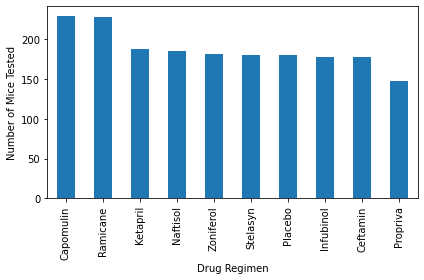

In [13]:
drug_regimen.plot(kind="bar", figsize=(6, 4))
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.tight_layout()

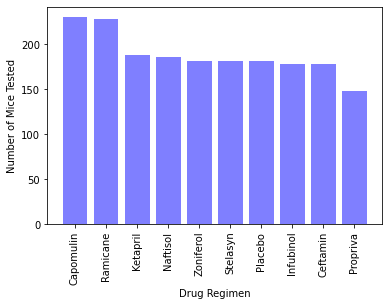

<Figure size 432x288 with 0 Axes>

In [14]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
x_axis = drug_regimen.index.values
y_axis = drug_regimen.values

# Create a Pyplot bar plot based off of the group series from before and label the title
plt.bar(x_axis, y_axis, color='b', alpha=0.5, align='center')

# Set the xlabel and ylabel, title using class methods
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xticks(rotation="vertical")

plt.show()
plt.tight_layout()

<AxesSubplot:ylabel='Sex'>

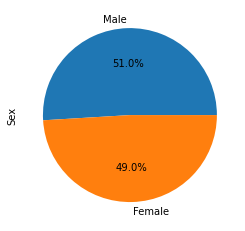

In [15]:
gender_group = clean_data["Sex"].value_counts()
gender_group.plot.pie(autopct="%1.1f%%", ylabel = "Sex")

Text(0, 0.5, 'Sex')

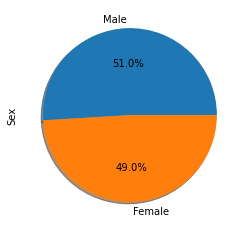

In [16]:
gender_group1 = clean_data["Sex"].value_counts()
label = gender_group1.index.values
plt.pie(gender_group1, autopct="%1.1f%%", shadow=True, startangle=0, labels = label)
plt.ylabel("Sex")

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_data = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin",:]
Ramicane_data = clean_data.loc[clean_data["Drug Regimen"] == "Ramicane", :]
Infubinol_data = clean_data.loc[clean_data["Drug Regimen"] == "Infubinol", :]
Ceftamin_data = clean_data.loc[clean_data["Drug Regimen"] == "Ceftamin", :]

In [18]:
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Capomulin_max = Capomulin_data.groupby('Mouse ID').max()['Timepoint']
Capomulin_vol = pd.DataFrame(Capomulin_max)
Capomulin_merge = pd.merge(Capomulin_vol, clean_data, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merge.head()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128         45           38.982878                 2    Capomulin   
1     b742         45           38.939633                 0    Capomulin   
2     f966         20           30.485985                 0    Capomulin   
3     g288         45           37.074024                 1    Capomulin   
4     g316         45           40.159220                 2    Capomulin   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1    Male           7          21  
2    Male          16          17  
3    Male           3          19  
4  Female          22          22

In [19]:
Ramicane_max = Ramicane_data.groupby('Mouse ID').max()['Timepoint']
Ramicane_vol = pd.DataFrame(Ramicane_max)
Ramicane_merge = pd.merge(Ramicane_vol, clean_data, on=("Mouse ID","Timepoint"),how="left")
Ramicane_merge.head()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     a411         45           38.407618                 1     Ramicane   
1     a444         45           43.047543                 0     Ramicane   
2     a520         45           38.810366                 1     Ramicane   
3     a644         45           32.978522                 1     Ramicane   
4     c458         30           38.342008                 2     Ramicane   

      Sex  Age_months  Weight (g)  
0    Male           3          22  
1  Female          10          25  
2    Male          13          21  
3  Female           7          17  
4  Female          23          20

In [20]:
Infubinol_max = Infubinol_data.groupby('Mouse ID').max()['Timepoint']
Infubinol_vol = pd.DataFrame(Infubinol_max)
Infubinol_merge = pd.merge(Infubinol_vol, clean_data, on=("Mouse ID","Timepoint"),how="left")
Infubinol_merge.head()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     a203         45           67.973419                 2    Infubinol   
1     a251         45           65.525743                 1    Infubinol   
2     a577         30           57.031862                 2    Infubinol   
3     a685         45           66.083066                 3    Infubinol   
4     c139         45           72.226731                 2    Infubinol   

      Sex  Age_months  Weight (g)  
0  Female          20          23  
1  Female          21          25  
2  Female           6          25  
3    Male           8          30  
4    Male          11          28

In [21]:
Ceftamin_max = Ceftamin_data.groupby('Mouse ID').max()['Timepoint']
Ceftamin_vol = pd.DataFrame(Ceftamin_max)
Ceftamin_merge = pd.merge(Ceftamin_vol, clean_data, on=("Mouse ID","Timepoint"),how="left")
Ceftamin_merge.head()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     a275         45           62.999356                 3     Ceftamin   
1     b447          0           45.000000                 0     Ceftamin   
2     b487         25           56.057749                 1     Ceftamin   
3     b759         30           55.742829                 1     Ceftamin   
4     f436         15           48.722078                 2     Ceftamin   

      Sex  Age_months  Weight (g)  
0  Female          20          28  
1    Male           2          30  
2  Female           6          28  
3  Female          12          25  
4  Female           3          25

In [36]:
mouse_id = clean_data.groupby(["Mouse ID"]).max()
mouse_id_index = mouse_id.reset_index()

mouse_data = mouse_id_index[['Mouse ID','Timepoint']].merge(clean_data,on=['Mouse ID','Timepoint'],how="left")

treatments = ["Capomulin","Ramicane","Infubinol","Ceftamin"]
plotting = []
for drug in treatments:
    tumor_vol = mouse_data.loc[mouse_data["Drug Regimen"] == drug]['Tumor Volume (mm3)']
    
    plotting.append(tumor_vol)
       
    quartiles = tumor_vol.quantile([.25,.5,.75])
    quart_first = quartiles[0.25]
    quart_last = quartiles[0.75]
    quart_range = quart_last - quart_first
    lower_bound = quart_first - (1.5 * quart_range)
    upper_bound = quart_last + (1.5 * quart_range)
    outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


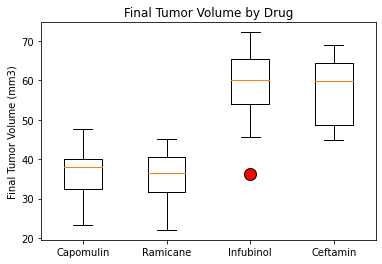

In [45]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
flierprops = dict(marker='o', markerfacecolor='r', markersize=12, markeredgecolor='black')
label = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
plt.boxplot(plotting,flierprops=flierprops, labels = label)
plt.title("Final Tumor Volume by Drug")
plt.ylabel('Final Tumor Volume (mm3)')

plt.show()

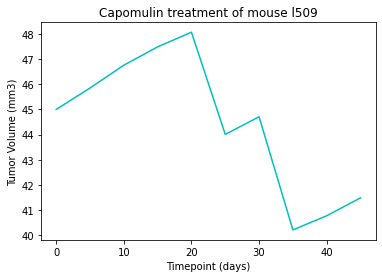

In [47]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
line_plot = clean_data.loc[(clean_data["Mouse ID"] == "l509")]
line_plot = line_plot.set_index("Timepoint")
line_plot

plt.plot(line_plot["Tumor Volume (mm3)"],color = "c")
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

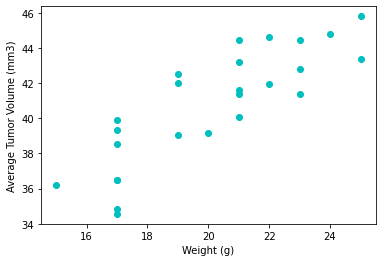

In [54]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
scatter_plot = clean_data.loc[(clean_data["Drug Regimen"] == "Capomulin")]

scatter_plot_data = scatter_plot.groupby(["Mouse ID"]).mean()

# set x and y values
weight_plot = scatter_plot_data["Weight (g)"]
volume_plot = scatter_plot_data["Tumor Volume (mm3)"]

# Plot the graph
plt.scatter(weight_plot, volume_plot, color = "c")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

The correlation between mouse weight and the average tumor volume is 0.84


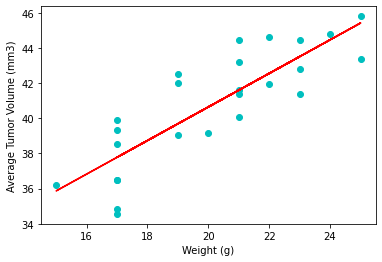

In [58]:
#Caluclate the linear regression model
slope, intercept, r_value , p_value, std_err = st.linregress(weight_plot, volume_plot)
y_value = slope * weight_plot + intercept

print(f"The correlation between mouse weight and the average tumor volume is {round(st.pearsonr(weight_plot, volume_plot)[0],2)}") 

#using prior computing data to plot the regression line on the scatter plot
scatter_plot = clean_data.loc[(clean_data["Drug Regimen"] == "Capomulin")]
scatter_plot_df = scatter_plot.groupby(["Mouse ID"]).mean()
weight_plot = scatter_plot_data["Weight (g)"]
volume_plot = scatter_plot_data["Tumor Volume (mm3)"]
plt.scatter(weight_plot, volume_plot, color = "c")
plt.plot(weight_plot, y_value, color = "r")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()
